**IMPORTANDO LIBRERIAS**

In [12]:
import pandas as pd
pd.set_option("display.precision", 2)

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)


**CREANDO UN DATA FRAME MEDIANTE EL ARCHIVO CSV DE **movies_1****

In [255]:
Datos = pd.read_csv("movies_1.csv") #Leyendo el archivo csv
Datos.columns = ["pelicula","clasificación","género","año","fecha lanzamiento","score","votos","director","escritor","protagonista",
                "país","presupuesto","recaudación","compañia","duración"] #Cambiando el nombre de las columnas del data frame
Datos.head() #Mostrando las primeras 5 filas del data frame

,pelicula,clasificación,género,año,fecha lanzamiento,score,votos,director,escritor,protagonista,país,presupuesto,recaudación,compañia,duración
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.40E+00,927.00E+03,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19.00E+06,47.00E+06,Warner Bros.,146.00E+00
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.80E+00,65.00E+03,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4.50E+06,58.85E+06,Columbia Pictures,104.00E+00
2,Star Wars: Episode V - The Empire St...,PG,Action,1980,"June 20, 1980 (United States)",8.70E+00,1.20E+06,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18.00E+06,538.38E+06,Lucasfilm,124.00E+00
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.70E+00,221.00E+03,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3.50E+06,83.45E+06,Paramount Pictures,88.00E+00
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.30E+00,108.00E+03,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6.00E+06,39.85E+06,Orion Pictures,98.00E+00


El archivo **movies_1.csv** contiene datos de peliculas desde 1980 hasta el 2020, sin embargo después del año 2015 existen muchos datos faltantes en el archivo, por tal motivo solo nos vamos a concentrar en las peliculas que tienen en su columa "año" el año del 2015

In [191]:
Datos = Datos.iloc[0:6843] #Modificando el data frame hasta la fila 6843, la cual es hasta donde las peliculas son del 2015
Datos.to_csv("movies_2.csv",index = False) #Guardando este DF en un archivo csv

In [192]:
Datos = pd.read_csv("movies_2.csv") #Leyendo este nuevo archivo csv como data frame
Datos.tail()

,pelicula,clasificación,género,año,fecha lanzamiento,score,votos,director,escritor,protagonista,país,presupuesto,recaudación,compañia,duración
6838,Paul Blart: Mall Cop 2,PG,Action,2015,"April 17, 2015 (United States)",4.40E+00,35.00E+03,Andy Fickman,Kevin James,Kevin James,United States,30.00E+06,107.59E+06,Columbia Pictures,94.00E+00
6839,Remember,R,Drama,2015,"December 17, 2015 (United States)",7.50E+00,24.00E+03,Atom Egoyan,Benjamin August,Christopher Plummer,Canada,NaN,4.24E+06,Serendipity Point Films,94.00E+00
6840,War Room,PG,Drama,2015,"August 28, 2015 (United States)",6.50E+00,14.00E+03,Alex Kendrick,Alex Kendrick,Priscilla C. Shirer,United States,3.00E+06,73.26E+06,FaithStep Films,120.00E+00
6841,Dragon Blade,R,Action,2015,"September 4, 2015 (United States)",6.00E+00,19.00E+03,Daniel Lee,Daniel Lee,Jackie Chan,China,65.00E+06,122.61E+06,Sparkle Roll Media,127.00E+00
6842,45 Years,R,Drama,2015,"August 28, 2015 (United Kingdom)",7.10E+00,32.00E+03,Andrew Haigh,Andrew Haigh,Charlotte Rampling,United Kingdom,NaN,14.43E+06,BFI Film Fund,91.00E+00


In [193]:
#Veamos si hay datos faltantes en el nuevo data frame que contiene las peliculas hasta el 2015
for columna in Datos.columns:
    promedio = Datos[columna].isnull().sum()
    print(f'{columna} - {promedio:.0f}')

pelicula - 0
clasificación - 48
género - 0
año - 0
fecha lanzamiento - 2
score - 0
votos - 0
director - 0
escritor - 2
protagonista - 1
país - 2
presupuesto - 1912
recaudación - 175
compañia - 12
duración - 3


Observamos que el data frame **Datos** sigue conteniendo valores nulos en diferentes columnas, vamos a eliminar estos valores y ver que porcentaje de datos nos queda después de la eliminación de los valores nulos

In [194]:
 #Eliminando las filas que contienen datos nulos y gusrdando este nuevo data frame en un archivo csv
Datos.dropna().to_csv("movies_not_null.csv",index=False)

In [7]:
#Leyendo este nuevo archivo csv sin valores nulos en un nuevo data frame 
Datos_2= pd.read_csv("movies_not_null.csv") 

In [195]:
len(Datos_2)/len(Datos) 
#Vemos que nos queda aproximadamente el 71% de los datos, lo cual es considereblemente bueno

0.7110916264796142

In [196]:
#Mostrando los primeros 5 elementos de este nuevo data frame
Datos_2.head()

,pelicula,clasificación,género,año,fecha lanzamiento,score,votos,director,escritor,protagonista,país,presupuesto,recaudación,compañia,duración
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.40E+00,927.00E+03,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19.00E+06,47.00E+06,Warner Bros.,146.00E+00
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.80E+00,65.00E+03,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4.50E+06,58.85E+06,Columbia Pictures,104.00E+00
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.70E+00,1.20E+06,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18.00E+06,538.38E+06,Lucasfilm,124.00E+00
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.70E+00,221.00E+03,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3.50E+06,83.45E+06,Paramount Pictures,88.00E+00
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.30E+00,108.00E+03,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6.00E+06,39.85E+06,Orion Pictures,98.00E+00


In [197]:
#Mostrando los tipos de los datos que se encuentran en cada columna del data frame
Datos_2.dtypes

pelicula              object
clasificación         object
género                object
año                    int64
fecha lanzamiento     object
score                float64
votos                float64
director              object
escritor              object
protagonista          object
país                  object
presupuesto          float64
recaudación          float64
compañia              object
duración             float64
dtype: object

In [198]:
#Haciendo el tipo de dato de la columna duración como entero
Datos_2["duración"] = Datos_2["duración"].astype("int64")

**EXPLORANDO LOS DATOS**

In [11]:
#Cantidad de datos
len(Datos_2)

4866

In [23]:
#Mostrando estadisticas como la media, minimo y maximo de las columnas númericas del data frame
Datos_2.describe()

,año,score,votos,presupuesto,recaudación,duración
count,4866.00,4866.00,4.87e+03,4.87e+03,4.87e+03,4866.00
mean,1999.86,6.38,1.13e+05,3.38e+07,9.18e+07,107.72
std,9.59,0.97,1.87e+05,3.81e+07,1.65e+08,18.19
min,1980.00,1.90,2.08e+02,6.00e+03,3.09e+02,63.00
25%,1992.00,5.80,1.70e+04,1.00e+07,1.00e+07,95.00
50%,2001.00,6.40,5.00e+04,2.00e+07,3.34e+07,105.00
75%,2008.00,7.00,1.26e+05,4.10e+07,1.01e+08,117.00
max,2015.00,9.30,2.40e+06,3.00e+08,2.85e+09,271.00


In [199]:
#Veamos las 5 peliculas que más dinero tuvieron de presupuesto
Datos_2.sort_values(by=["presupuesto"],inplace= False,ascending = False).head()

,pelicula,clasificación,género,año,fecha lanzamiento,score,votos,director,escritor,protagonista,país,presupuesto,recaudación,compañia,duración
3417,Pirates of the Caribbean: at World's End,PG-13,Action,2007,"May 25, 2007 (United States)",7.10E+00,608.00E+03,Gore Verbinski,Ted Elliott,Johnny Depp,United States,300.00E+06,961.00E+06,Walt Disney Pictures,169
3264,Superman Returns,PG-13,Action,2006,"June 28, 2006 (United States)",6.00E+00,274.00E+03,Bryan Singer,Michael Dougherty,Brandon Routh,United States,270.00E+06,391.08E+06,Warner Bros.,154
3914,Tangled,PG,Animation,2010,"November 24, 2010 (United States)",7.70E+00,417.00E+03,Nathan Greno,Dan Fogelman,Mandy Moore,United States,260.00E+06,592.46E+06,Walt Disney Animation Studios,100
3415,Spider-Man 3,PG-13,Action,2007,"May 4, 2007 (United States)",6.20E+00,513.00E+03,Sam Raimi,Sam Raimi,Tobey Maguire,United States,258.00E+06,894.98E+06,Columbia Pictures,139
4711,Avengers: Age of Ultron,PG-13,Action,2015,"May 1, 2015 (United States)",7.30E+00,777.00E+03,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,250.00E+06,1.40E+09,Marvel Studios,141


Se encuentra que las peliculas **Pirates of the Caribbean, Superman Returns, Tangled, Spider-man 3 y Avenger: Age of Ultron** son las peliculas que más dinero en su presupuesto tuvieron

In [200]:
#Veamos las 5 peliculas que más dinero recaudaron
Datos_2.sort_values(by=["recaudación"],inplace= False,ascending = False).head()

,pelicula,clasificación,género,año,fecha lanzamiento,score,votos,director,escritor,protagonista,país,presupuesto,recaudación,compañia,duración
3731,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.80E+00,1.10E+06,James Cameron,James Cameron,Sam Worthington,United States,237.00E+06,2.85E+09,Twentieth Century Fox,162
1795,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.80E+00,1.10E+06,James Cameron,James Cameron,Leonardo DiCaprio,United States,200.00E+06,2.20E+09,Twentieth Century Fox,194
4730,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.80E+00,876.00E+03,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245.00E+06,2.07E+09,Lucasfilm,138
4720,Jurassic World,PG-13,Action,2015,"June 12, 2015 (United States)",7.00E+00,593.00E+03,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150.00E+06,1.67E+09,Universal Pictures,124
4224,The Avengers,PG-13,Action,2012,"May 4, 2012 (United States)",8.00E+00,1.30E+06,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220.00E+06,1.52E+09,Marvel Studios,143


Se encuentra que las peliculas **Avatar, Titanic, Star Wars: Episode VII, Jurassic World y The Avengers** son las peliculas que más dinero recaudaron

**ANALIZANDO CORRELACIÓN ENTRE LAS VARIABLES NÚMERICAS**

Se piensa que el presupuesto que tiene una pelicula esta relacionada linealmente con el dinero recaudado de la misma, esto es que, mientras que una pelicula tiene mayor presupuesto entonces mayor será su recaudación de dinero

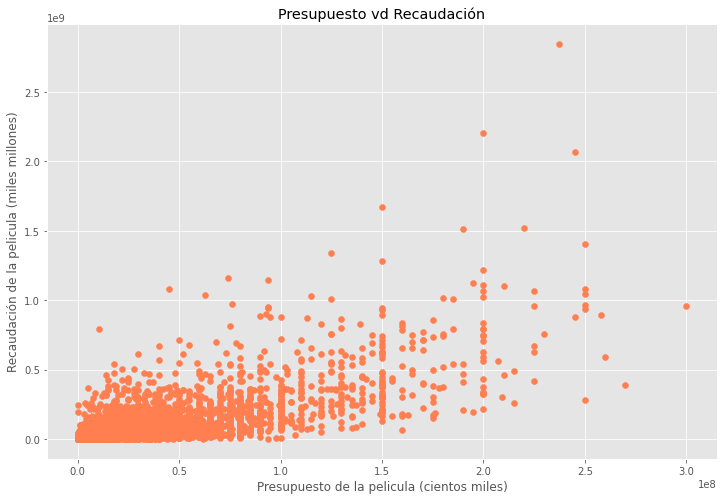

In [14]:
#Graficando el presupuesto vs la recaudación de las peliculas
plt.scatter(x=Datos_2["presupuesto"],y=Datos_2["recaudación"],color="coral")
plt.title("Presupuesto vd Recaudación")
plt.xlabel("Presupuesto de la pelicula (cientos miles)")
plt.ylabel("Recaudación de la pelicula (miles millones)")
plt.show()

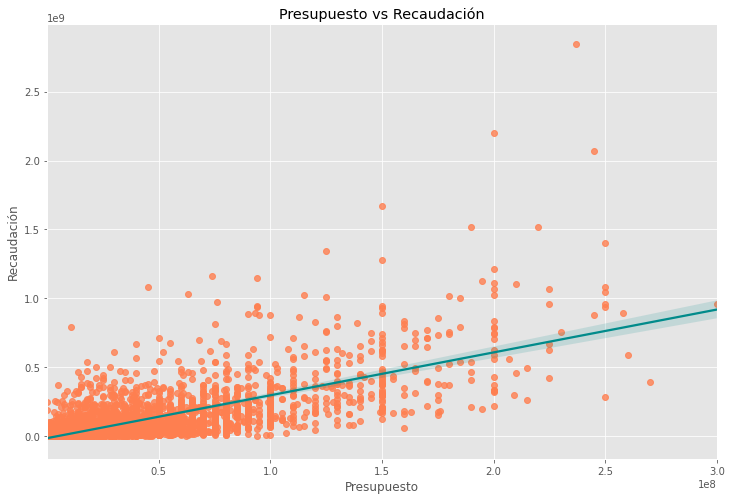

In [258]:
#Ahora tracemos la linea de regresión que se ajusta mejor a los datos

y = sns.regplot(x="presupuesto",y="recaudación",data = Datos_2,color="coral", line_kws = {"color": "darkcyan"})
y.set_title("Presupuesto vs Recaudación")
y.set_xlabel("Presupuesto")
y.set_ylabel("Recaudación")
plt.show()

Con las gráficas anteriores nos podemos dar una idea que las variables de presupuesto y recaudación tienen una relación lineal positiva significativa, ahora veamos el valor de ésta


In [16]:
#Viendo la correlación entre cada variable númerica
matriz_corr = Datos_2.corr()
matriz_corr

,año,score,votos,presupuesto,recaudación,duración
año,1.00,0.04,0.23,0.33,0.25,0.05
score,0.04,1.00,0.47,0.05,0.22,0.41
votos,0.23,0.47,1.00,0.44,0.64,0.34
presupuesto,0.33,0.05,0.44,1.00,0.72,0.30
recaudación,0.25,0.22,0.64,0.72,1.00,0.27
duración,0.05,0.41,0.34,0.30,0.27,1.00


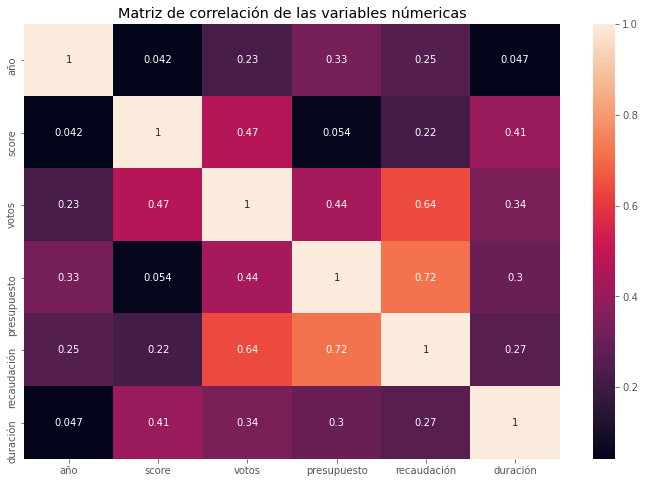

In [24]:
#Visualizando la matriz de correlación
matriz_corr = Datos_2.corr()
sns.heatmap(matriz_corr,annot=True)
plt.title("Matriz de correlación de las variables númericas")
plt.show()

Notamos que las variables de **presupuesto** y **recaudación** tienen una correlación del 0.72 con respecto al coeficiente de correlación de pearson, con esto se puede observar que existe una relación lineal positiva entre ambas variables. \
Se observa que esta relación es la más significativa entre las variables númericas, y el valor siguiente es el de la relación entre los **votos** y la **recaudación**, con un valor de correlación de 0.64